#TRABAJO FINAL BDS G3
##"ENTRENAMIENTO DE MODELO DE ..."
FUENTE : [KAGGLE](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

AUTOR: JAVIER CHACNAMA QUISPE

In [32]:
!pip install pyjanitor
import janitor

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
sns.set(style='whitegrid',context='notebook')

#1. DATASET


In [35]:
DATASET_PATH = 'https://github.com/JavierChQ/datasets/raw/refs/heads/main/StudentPerformanceFactors.csv'
df = pd.read_csv(DATASET_PATH)
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [36]:
df = df.clean_names()
df

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#2. ANALISIS EXPLORATORIO DE DATOS

##2.1. NÚMERO DE OBSERVACIONES Y VARIABLES

In [37]:
df.shape

(6607, 20)

##2.2. TIPOS DE DATOS

In [38]:
df.dtypes

,0
hours_studied,int64
attendance,int64
parental_involvement,object
access_to_resources,object
extracurricular_activities,object
sleep_hours,int64
previous_scores,int64
motivation_level,object
internet_access,object
tutoring_sessions,int64


In [39]:
df.dtypes.value_counts()

,count
object,13
int64,7


##2.3. VALORES NULOS EN EL CONJUNTO DE DATOS

In [40]:
df.isnull().any()

,0
hours_studied,False
attendance,False
parental_involvement,False
access_to_resources,False
extracurricular_activities,False
sleep_hours,False
previous_scores,False
motivation_level,False
internet_access,False
tutoring_sessions,False


VALORES NULOS POR CADA VARIABLE

In [41]:
df.isnull().sum().sort_values(ascending=False)

,0
parental_education_level,90
teacher_quality,78
distance_from_home,67
hours_studied,0
access_to_resources,0
parental_involvement,0
attendance,0
extracurricular_activities,0
motivation_level,0
internet_access,0


TOTAL DE VALORES NULOS

In [42]:
df.isnull().sum().sum()

np.int64(235)

PROPORCION DE VALORES NULOS POR CADA VARIABLE

In [43]:
plot_null_df = df.isnull().melt(value_name='missing')
plot_null_df

,variable,missing
0,hours_studied,False
1,hours_studied,False
2,hours_studied,False
3,hours_studied,False
4,hours_studied,False
...,...,...
132135,exam_score,False
132136,exam_score,False
132137,exam_score,False
132138,exam_score,False


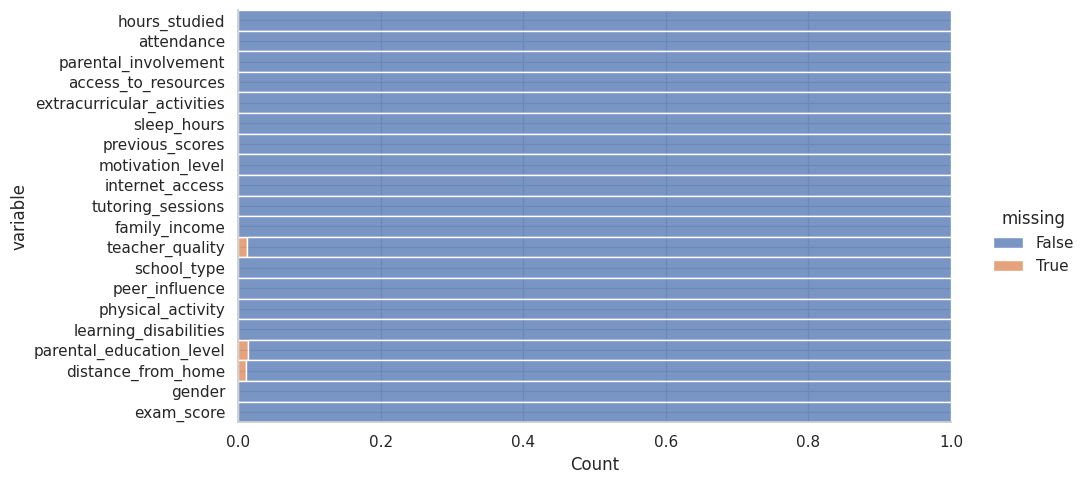

In [44]:
sns.displot(data=plot_null_df,y='variable',hue='missing',aspect=2,multiple='fill')

ELIMINACION DE VALORES NULOS


In [45]:
df_clean = df.copy()
df_clean.dropna(subset=['teacher_quality', 'parental_education_level', 'distance_from_home'], inplace=True)
df_clean.isnull().sum().sum()

np.int64(0)

##2.4. VALORES ATIPICOS

In [46]:
df_clean = df_clean.select_dtypes(include='number').copy()
df_clean.head(2)

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61


<Axes: >

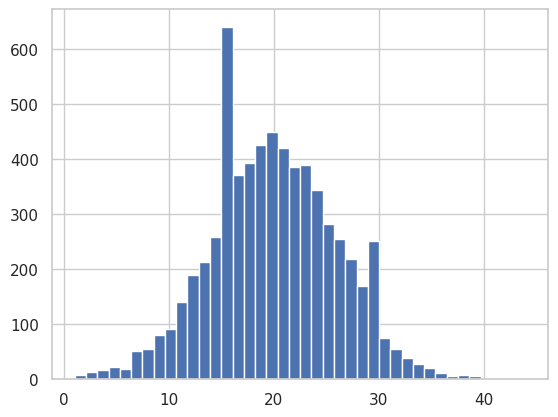

In [47]:
df_clean.hours_studied.hist(bins=40)

<Axes: >

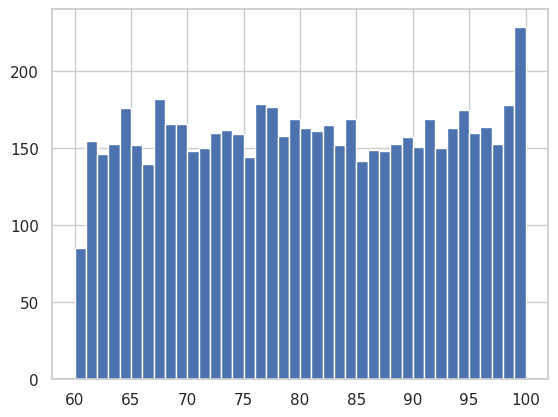

In [48]:
df_clean.	attendance.hist(bins=40)

<Axes: >

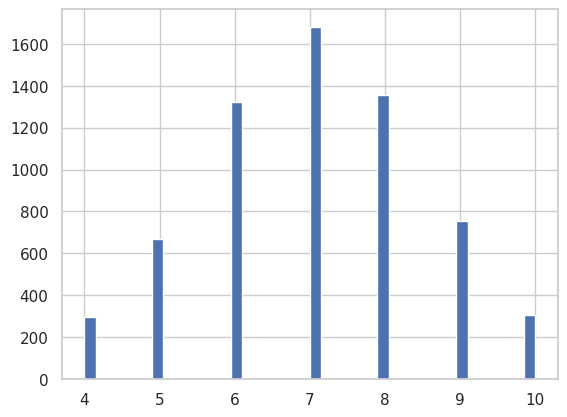

In [49]:
df_clean.	sleep_hours.hist(bins=40)

<Axes: >

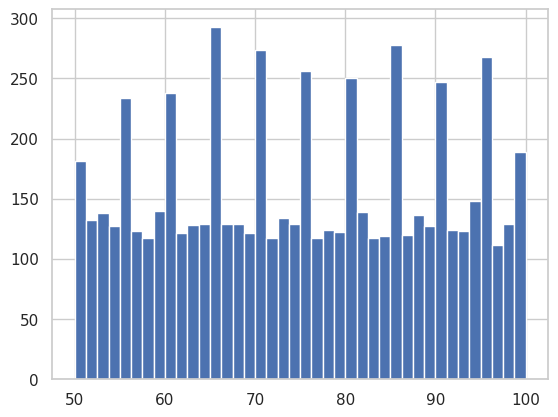

In [50]:
df_clean.	previous_scores.hist(bins=40)

<Axes: >

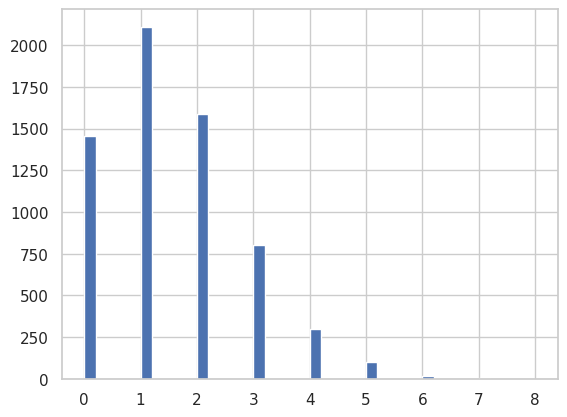

In [51]:
df_clean.	tutoring_sessions.hist(bins=40)

<Axes: >

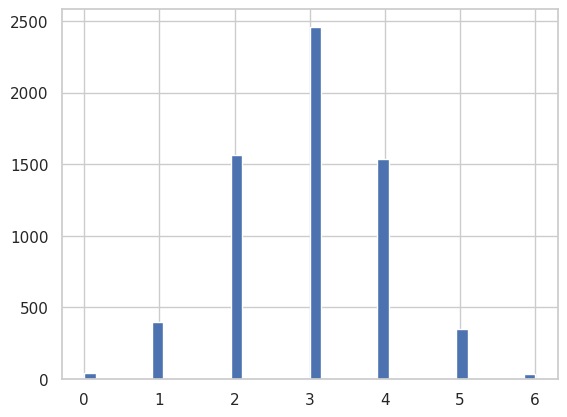

In [52]:
df_clean.	physical_activity.hist(bins=40)

<Axes: >

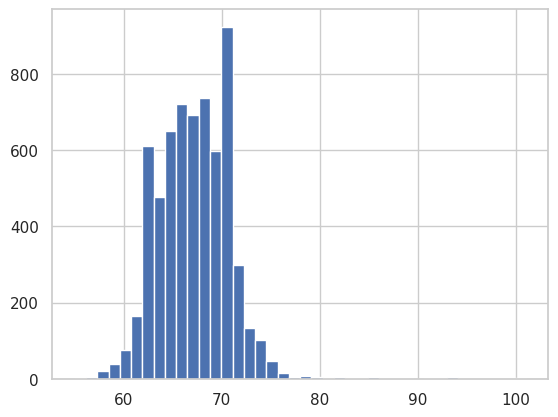

In [53]:
df_clean.	exam_score.hist(bins=40)

#3. CORRELACIONES

In [54]:
df_clean.columns

Index(['hours_studied', 'attendance', 'sleep_hours', 'previous_scores',
       'tutoring_sessions', 'physical_activity', 'exam_score'],
      dtype='object')

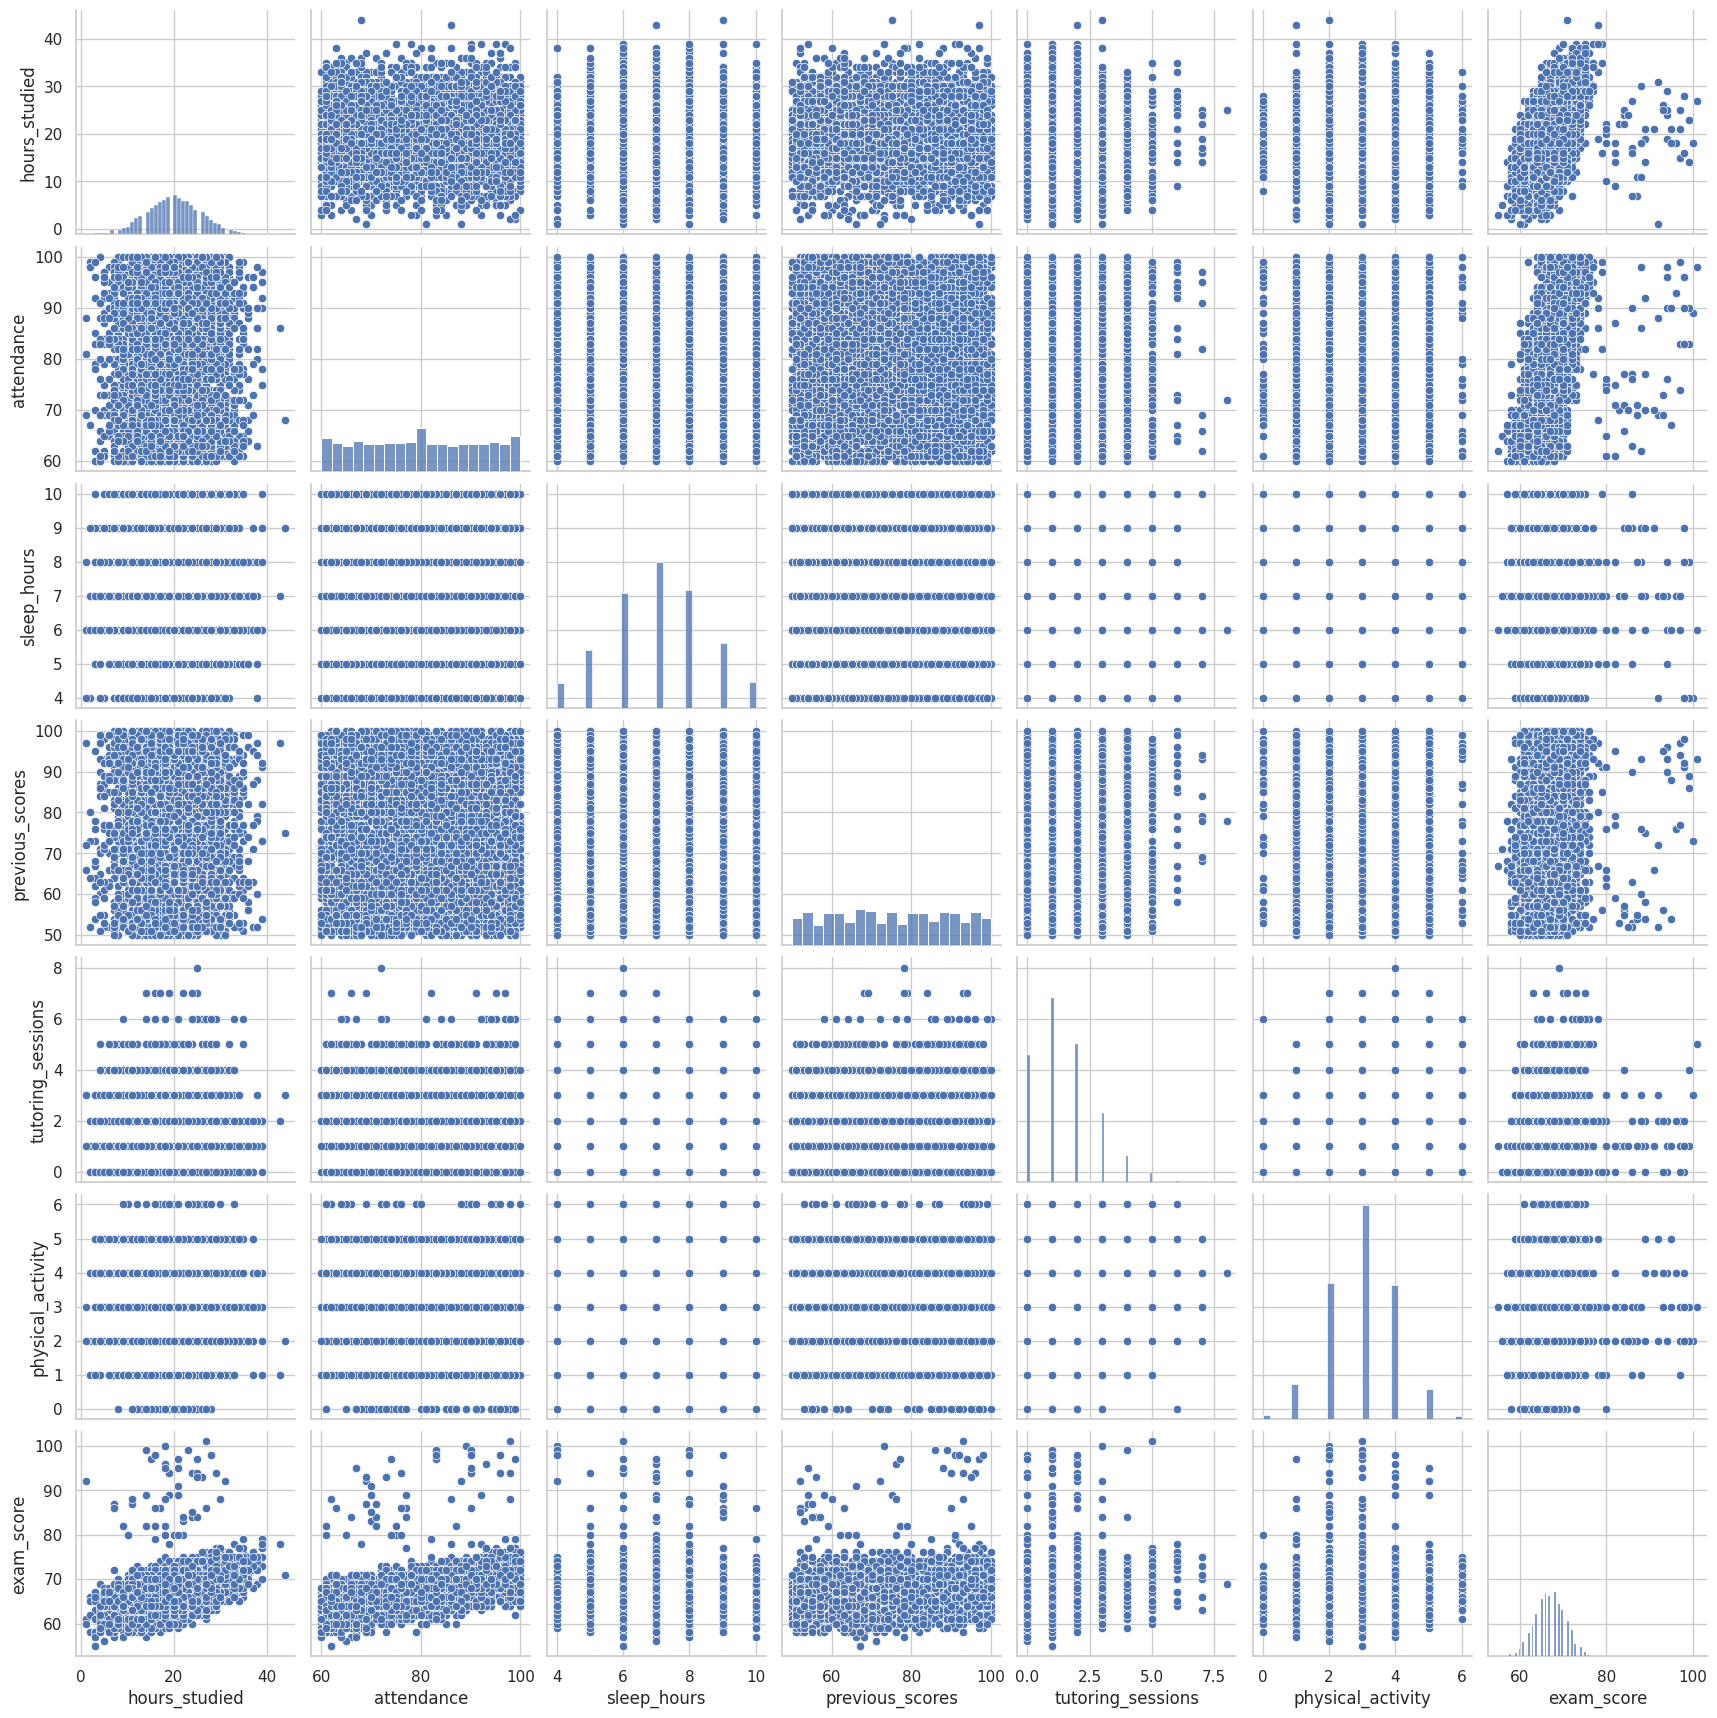

In [ ]:
sns.pairplot(df_clean,height=2.5)
plt.show()

<Axes: >

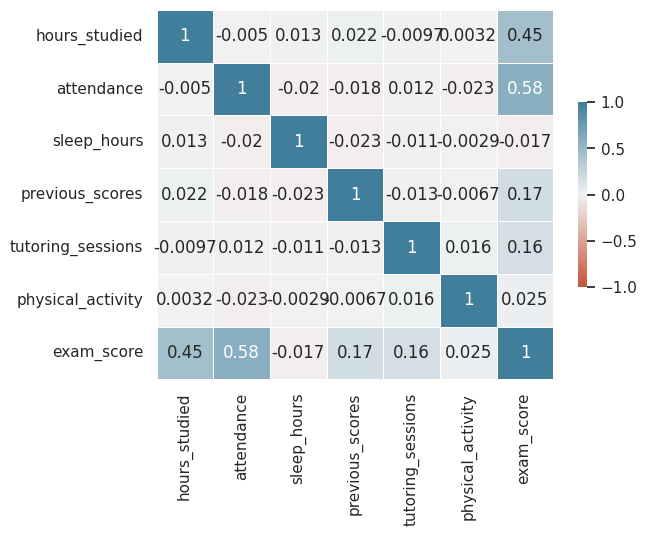

In [55]:
sns.heatmap(
    data=df_clean.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

#4. ESCALAMIENTO DE DATOS

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [57]:
X = df_clean[['hours_studied', 'attendance']].values
y = df_clean[['exam_score']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [58]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

#5. EVALUACION DEL MODELO

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [60]:
# Definir modelos de regresión
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Red Neuronal (MLP)": MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\n{nombre}:')
    print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
    print(f'Coeficiente de Determinación (R²): {r2:.4f}')
    return r2

# Comparar modelos
resultados = {}
for nombre, modelo in modelos.items():
    resultados[nombre] = evaluar_modelo(modelo, nombre)

# Mostrar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f'\nEl mejor modelo es: {mejor_modelo} con un R² de {resultados[mejor_modelo]:.4f}')


Regresión Lineal:
Error Cuadrático Medio (MSE): 0.4533
Coeficiente de Determinación (R²): 0.5467

Ridge:
Error Cuadrático Medio (MSE): 0.4533
Coeficiente de Determinación (R²): 0.5467

Lasso:
Error Cuadrático Medio (MSE): 0.4752
Coeficiente de Determinación (R²): 0.5248


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest:
Error Cuadrático Medio (MSE): 0.5280
Coeficiente de Determinación (R²): 0.4720

Gradient Boosting:
Error Cuadrático Medio (MSE): 0.4532
Coeficiente de Determinación (R²): 0.5468


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVR:
Error Cuadrático Medio (MSE): 0.4560
Coeficiente de Determinación (R²): 0.5440

XGBoost:
Error Cuadrático Medio (MSE): 0.4753
Coeficiente de Determinación (R²): 0.5247


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Red Neuronal (MLP):
Error Cuadrático Medio (MSE): 0.4515
Coeficiente de Determinación (R²): 0.5485

El mejor modelo es: Red Neuronal (MLP) con un R² de 0.5485


<ipython-input-62-189a78babcfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')


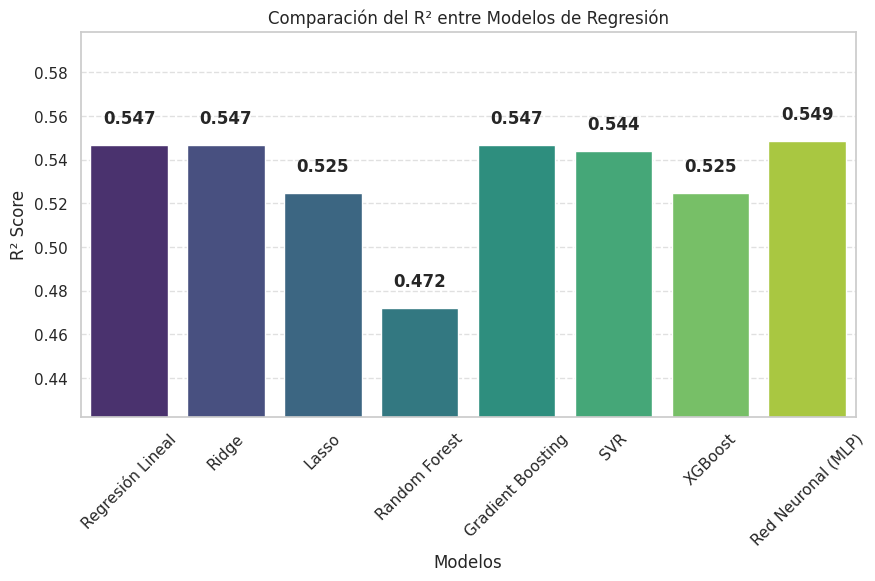

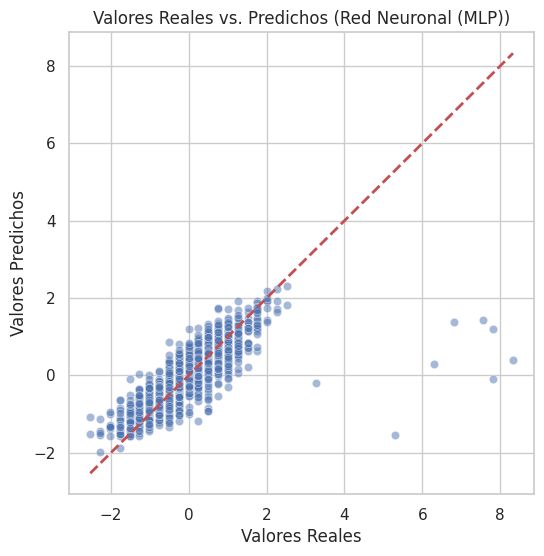

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mejora en la visualización de la comparación de R²
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette='viridis')

# Agregar etiquetas de los valores en las barras
for index, value in enumerate(resultados.values()):
    ax.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

# Ajustar los límites del eje Y para resaltar diferencias
plt.ylim(min(resultados.values()) - 0.05, max(resultados.values()) + 0.05)

plt.xlabel('Modelos')
plt.ylabel('R² Score')
plt.title('Comparación del R² entre Modelos de Regresión')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Evaluación del mejor modelo seleccionado
modelo_seleccionado = modelos[mejor_modelo]
y_pred_mejor = modelo_seleccionado.predict(X_test)

# Gráfico de dispersión entre valores reales y predichos
plt.figure(figsize=(6, 6))
#sns.scatterplot(x=y_test, y=y_pred_mejor, alpha=0.5)
sns.scatterplot(x=np.ravel(y_test), y=np.ravel(y_pred_mejor), alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Valores Reales vs. Predichos ({mejor_modelo})')
plt.show()

# Histograma de errores (residuos)
#errores = y_test - y_pred_mejor
#plt.figure(figsize=(8, 5))
#sns.histplot(errores, bins=20, kde=True, color='blue')
#plt.xlabel('Error (y_real - y_predicho)')
#plt.ylabel('Frecuencia')
#plt.title(f'Distribución de Errores ({mejor_modelo})')
#plt.show()

GUARDADO DEL MEJOR MODELO Y SCALERS

In [67]:
import joblib
# Guardar modelo y scalers
joblib.dump(modelo_seleccionado, 'modelo.pkl')
joblib.dump(sc_x, 'scaler_x.pkl')
joblib.dump(sc_y, 'scaler_y.pkl')

['scaler_y.pkl']

PROBAR MODELO

In [68]:
model_student_performance = joblib.load('/content/modelo.pkl')
scaler_x = joblib.load('/content/scaler_x.pkl')
scaler_y = joblib.load('/content/scaler_y.pkl')

In [69]:
horas_estudio = 23
asistencia = 84

new_data = np.array([[horas_estudio,asistencia]])
data_scaled = scaler_x.transform(new_data)
prediction_scaled = model_student_performance.predict(data_scaled)
puntaje_examen_predicted = scaler_y.inverse_transform(prediction_scaled.reshape(-1,1))

print(f'El puntaje de examen alcanzado para un alumno con {horas_estudio} horas de estudio y  {asistencia} de asistencia es {puntaje_examen_predicted[0][0]:.2f}')

El puntaje de examen alcanzado para un alumno con 23 horas de estudio y  84 de asistencia es 68.80
